<a href="https://colab.research.google.com/github/nikitha-ramchander/Sales-Prediction/blob/main/SalesDataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Data
sales = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Project/salesdatacleaning.csv')
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,No_Weight_Flag,No_Size_Flag
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800,0,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,0


#Data Visualization
Built several data visualizations that help better understand the data.

In [5]:
# What are the total sales for each type of item?
item_type = sales.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending= False)

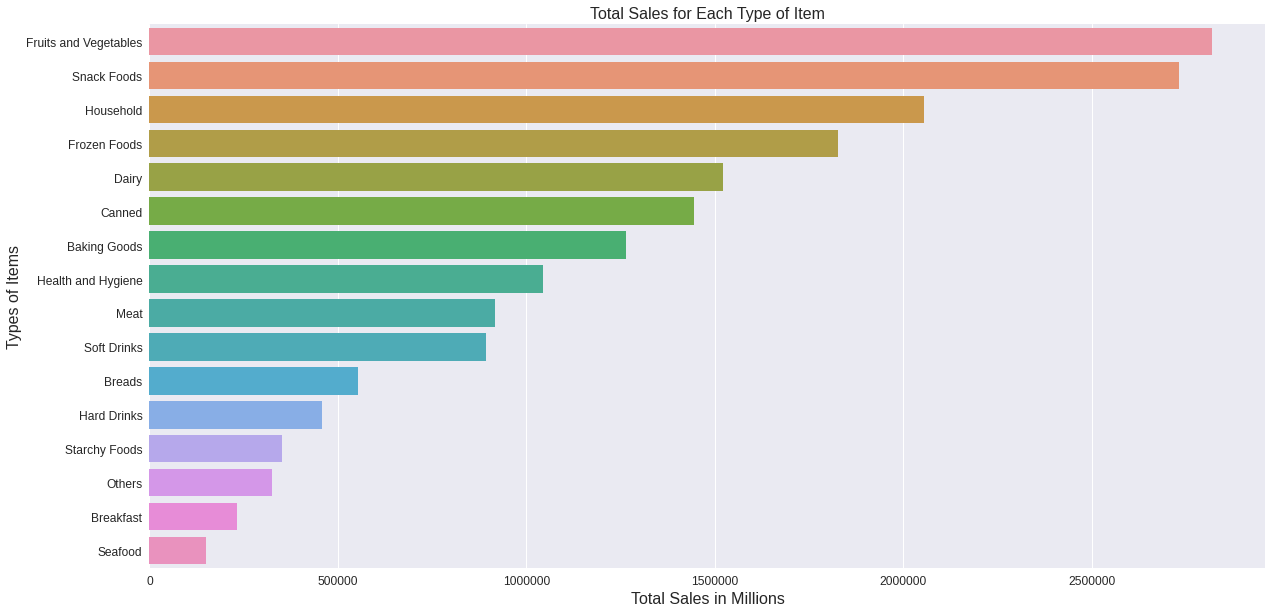

In [6]:
plt.figure(figsize=(20,10));
plt.style.use('seaborn');
sns.barplot(x = item_type.values, y = item_type.index)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('Total Sales in Millions', fontsize = 16)
plt.ylabel('Types of Items', fontsize = 16)
plt.title('Total Sales for Each Type of Item', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')

Interpretation: Fruits and Vegetables has the most sales coming in at over 2.5 million. Seafood has the least amount of sales at around one hundred thousand. 

In [7]:
# What is the average sales for each type of outlet?
outlet_type = sales.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending = False)

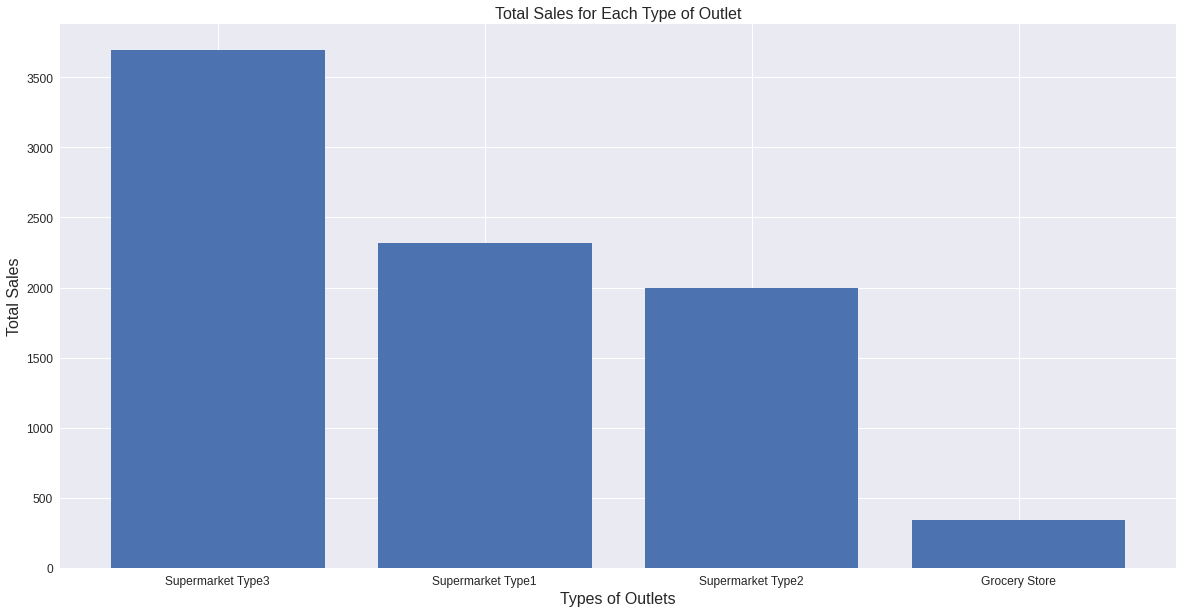

In [8]:
plt.figure(figsize=(20,10));
plt.style.use('seaborn');
plt.bar(outlet_type.index, outlet_type.values);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('Types of Outlets', fontsize = 16);
plt.ylabel('Total Sales', fontsize = 16);
plt.title('Total Sales for Each Type of Outlet', fontsize = 16);

Interpretation: On average each Supermarket Type3 makes a total sale of over 3500 which is the most of the 4 outlet types. Grocery Outlet Type makes less than 500 for each outlet.

In [37]:
# What are the top 3 item type sales in Supermarket Type 3? 
supermarket_type_3 = sales['Outlet_Type'] == 'Supermarket Type3'
sales1 = sales[supermarket_type_3]

In [38]:
sm3 = sales1.groupby(['Item_Type'])[['Item_Outlet_Sales']].mean().sort_values(by = 'Item_Outlet_Sales')

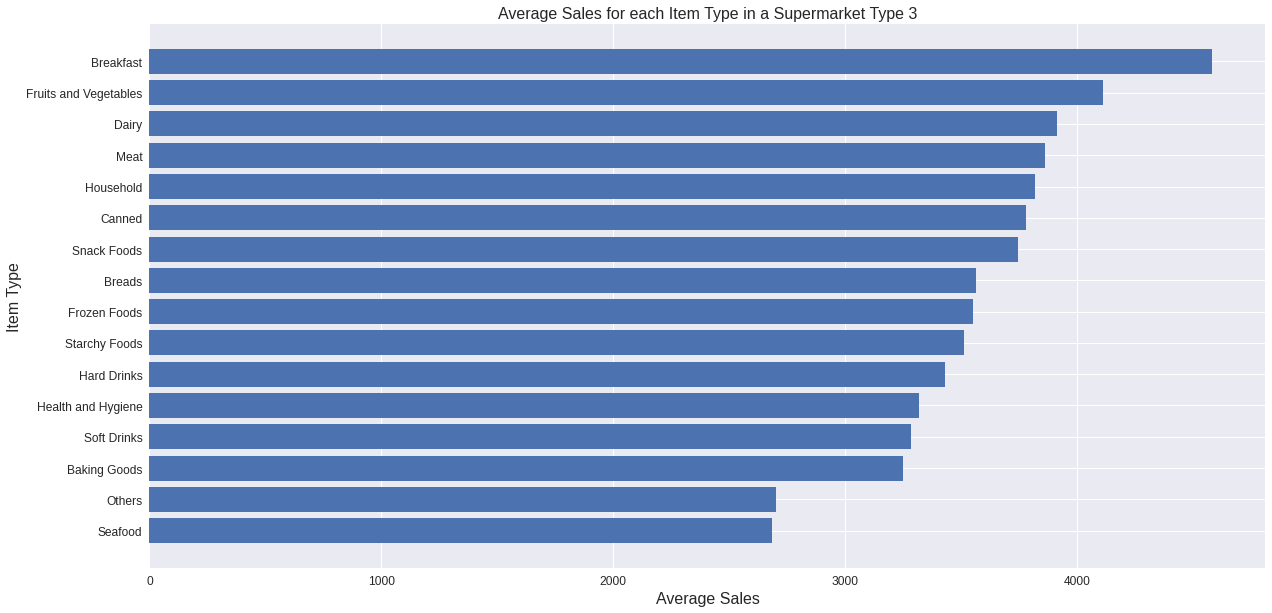

In [63]:
plt.figure(figsize=(20,10));
plt.style.use('seaborn');
plt.barh(sm3.index, sm3['Item_Outlet_Sales'])
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('Average Sales', fontsize = 16);
plt.ylabel('Item Type', fontsize = 16);
plt.title('Average Sales for each Item Type in a Supermarket Type 3', fontsize = 16);

Interpretation: The top 3 highest sales of item types in Supermarket Type 3 are Breakfast, Fruits/Vegetables, and Dairy.  

In [41]:
# What are the top 3 item type sales in Grocery Store? 
grocery_store = sales['Outlet_Type'] == 'Grocery Store'
sales2 = sales[grocerystore]

In [42]:
gt = sales2.groupby(['Item_Type'])[['Item_Outlet_Sales']].mean().sort_values(by = 'Item_Outlet_Sales')

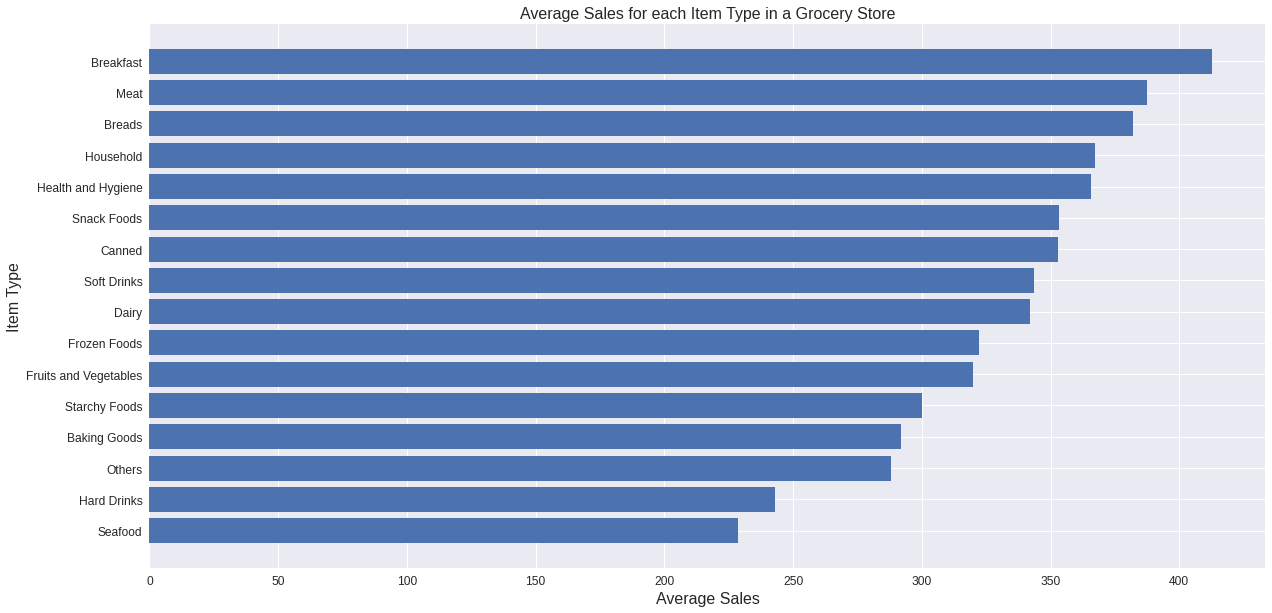

In [51]:
plt.figure(figsize=(20,10));
plt.barh(gt.index, gt['Item_Outlet_Sales'])
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('Average Sales', fontsize = 16);
plt.ylabel('Item Type', fontsize = 16);
plt.title('Average Sales for each Item Type in a Grocery Store', fontsize = 16);

Interpretation: The top 3 highest sales of item types in Grocery Store are Breakfast, Meat, and Breads.  

In [9]:
# What are the total sales for each year of establishment? 
establishment = sales.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()

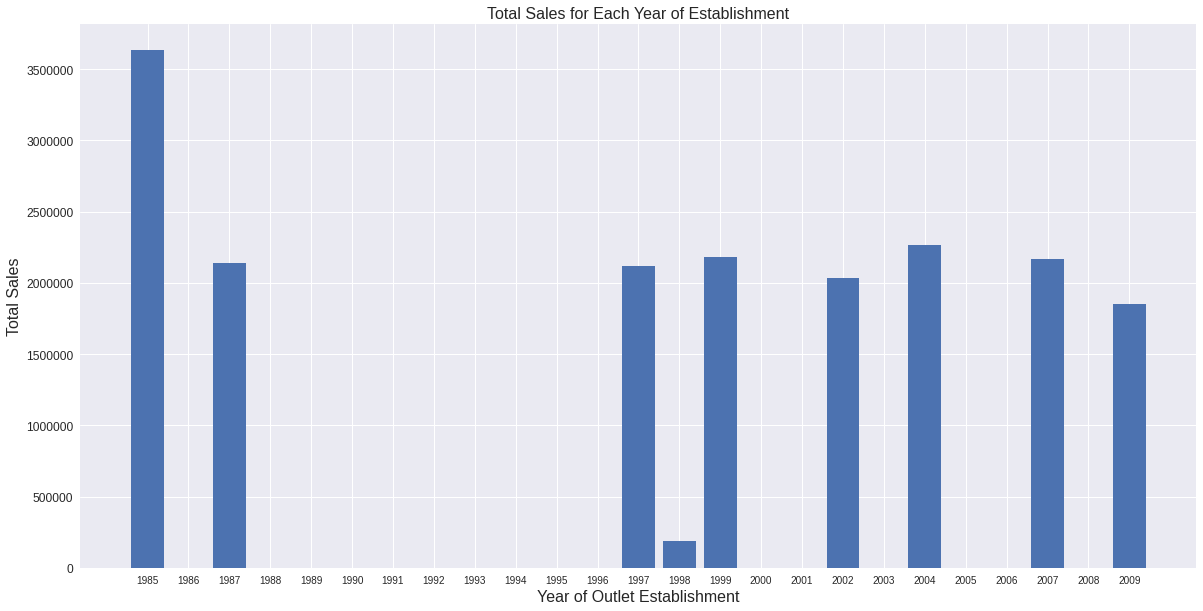

In [10]:
plt.figure(figsize=(20,10));
plt.bar(establishment.index, establishment.values);
x = establishment.index
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(fontsize = 12);
plt.xlabel('Year of Outlet Establishment', fontsize = 16);
plt.ylabel('Total Sales', fontsize = 16);
plt.title('Total Sales for Each Year of Establishment', fontsize = 16);
# Get rid of scientific notation: https://www.reddit.com/r/learnpython/comments/el4vbx/how_to_remove_scientific_notation_from_a/
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False);

Interpretation: The year 1985 had the most sales and the year 1998 had the lowest sales. From this graph you can also tell the years between 1987 and 1997 has no data, as well as years 2000, 2001, 2005, and 2006. I'm assuming data wasn't gathered for those years.

<Figure size 1440x720 with 0 Axes>

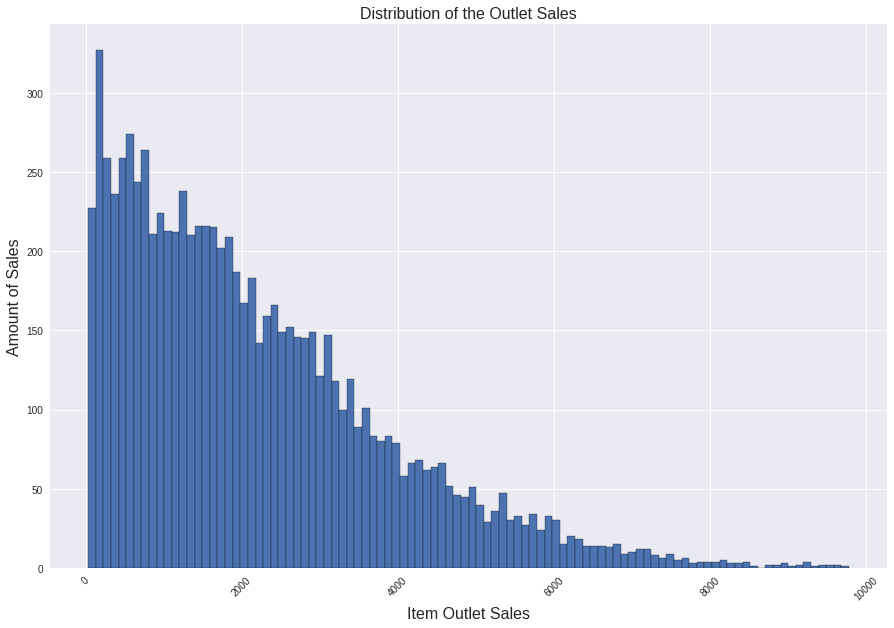

In [11]:
# Show distribution of Item Outlet Sales. 
plt.figure(figsize=(20,10));
plt.style.use('seaborn')
plt.figure(figsize=(15, 10));
price_filter = sales.loc[:, 'Item_Outlet_Sales'] <= 10000
sales.loc[price_filter, 'Item_Outlet_Sales'].hist(bins = 100,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Item Outlet Sales', fontsize = 16);
plt.ylabel('Amount of Sales', fontsize = 16);
plt.title('Distribution of the Outlet Sales', fontsize = 16);

Interpretation: This graphs shows the price range for the amount of outlet sales being done. There are higher bars in the really low price range meaning that most items are sold under $200. 

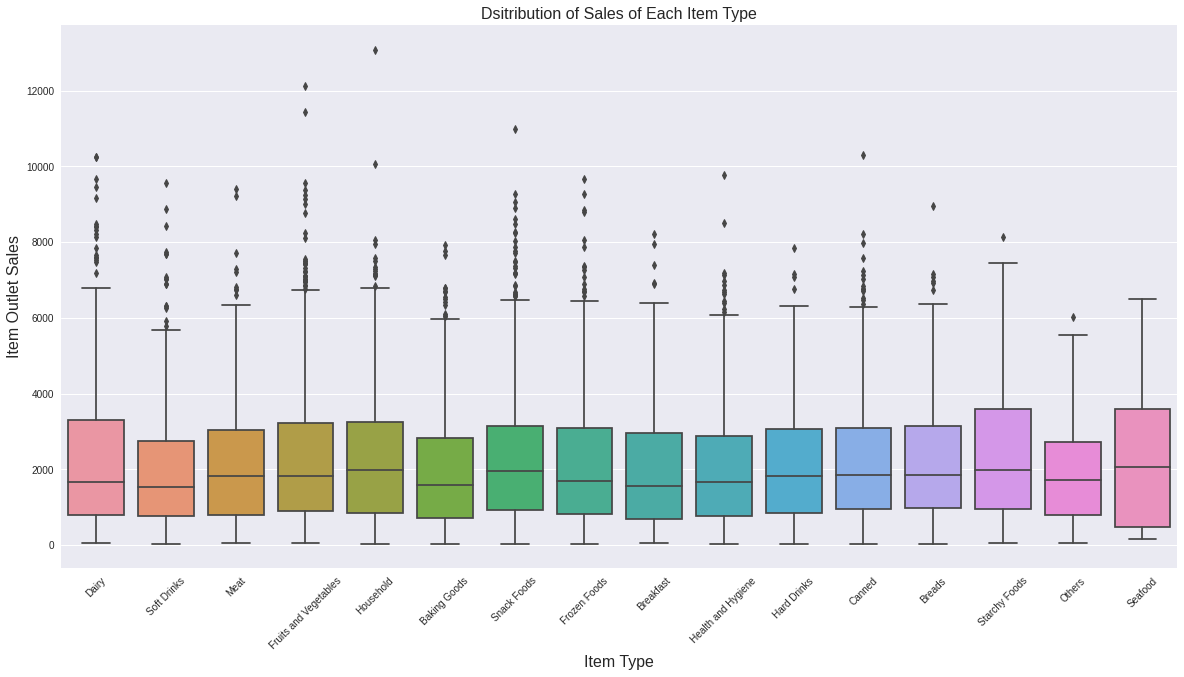

In [12]:
# Show a boxplot of all the Item Types and their respective sales.
plt.figure(figsize=(20,10));
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=sales);
plt.xticks(rotation = 45);
plt.xlabel('Item Type', fontsize = 16);
plt.ylabel('Item Outlet Sales', fontsize = 16);
plt.title('Dsitribution of Sales of Each Item Type', fontsize = 16);

Interpretation: Overall all Item Types are fairly consistent around the 2,000 mark which back up our finding in the previous graph. The lower 25% has a short distance meaning that the data is tightly packed and a lot of our data has low sale amounts. The top 25% has varying degrees and is more spread out showing us higher ranges of sales. For Item Types of 'Fruits and Vegetables' and 'Household' they have the most spread out outliers which means that there were sales in the $12,000 range. 

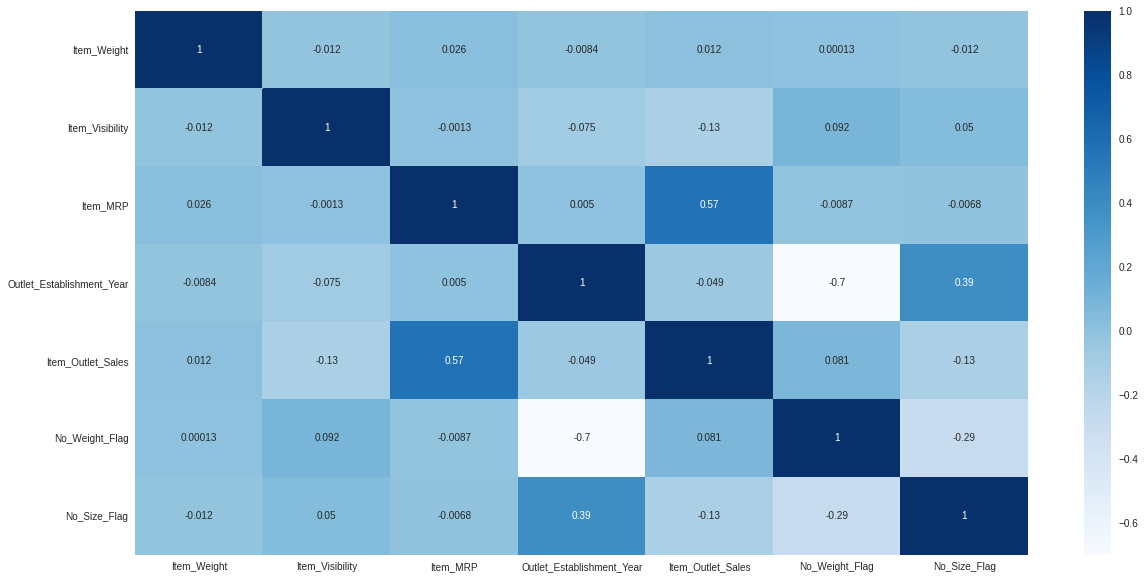

In [13]:
# Create a heatmap of the correlation between features.
plt.figure(figsize=(20,10));
sns.heatmap(sales.corr(), annot= True, cmap= 'Blues');

Interpretation: This heatmap shows the correlation of all features. The darker blue shows a perfect positive correlation, all-white show a perfect negative correlation, and light blue would show no correlation. The darkest blue or '1' correlation is the correlation of the feature in itself and that is why it is a perfect positive correlation. The next strongest positive correlation is between 'Item Outlet Sales' and 'Item MRP'. This might be the case because if we know the maximum retail price (list price) of the product then we can predict how many total sales there will be of each product.  'No Weight Flag' and 'Outlet Establishment Year' columns have a fairly strong negative correlation, meaning when one increases, the other decreases. A reason for that could be the year 1985 had no record of Item Weight for any of the Item Types.  
